In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from  scipy.stats import norm,skew

In [171]:
train=pd.read_csv("data/train.csv", parse_dates=["datetime"])
test=pd.read_csv("data/test.csv", parse_dates=["datetime"])
train["cnt"]=train["count"]
train.drop(["count"],axis=1,inplace=True)

In [108]:
n_train=train.shape[0]
n_test=test.shape[0]
y_train=train.cnt.values
print (n_train,n_test)

10886 6493


In [82]:
train.head()
print(train.shape)

(10886, 12)


In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
cnt           10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [84]:
train.shape,test.shape

((10886, 12), (6493, 9))

In [85]:
test["casual"]=np.nan
test["registered"]=np.nan
test["cnt"]=np.nan

In [86]:
train.columns,test.columns

(Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
        'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'cnt'],
       dtype='object'),
 Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
        'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'cnt'],
       dtype='object'))

In [91]:
all_data=pd.concat([train,test],axis=0)

In [92]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 12 columns):
datetime      17379 non-null datetime64[ns]
season        17379 non-null int64
holiday       17379 non-null int64
workingday    17379 non-null int64
weather       17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
humidity      17379 non-null int64
windspeed     17379 non-null float64
casual        10886 non-null float64
registered    10886 non-null float64
cnt           10886 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(5)
memory usage: 1.7 MB


In [93]:
all_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,cnt
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


In [94]:
all_data.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,cnt
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN
6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,NaN,NaN,NaN


In [95]:
def bar_plot(x,y,data,hue=None):
    f,ax=plt.subplots()
    plt.xticks(rotation=70)
    sns.barplot(x=x,y=y,data=data,hue=hue)
    plt.show()
def count_plot(x):
    f,ax=plt.subplots()
    sns.countplot(x)
    plt.show()
def dist_plot(x):
    f,ax=plt.subplots()
    sns.distplot(x,fit=norm)
    plt.show()
def scatter_plot(x,y):
    f,ax=plt.subplots()
    sns.scatterplot(x=x,y=y)
    plt.show()

skip col : datetime
draw col: season


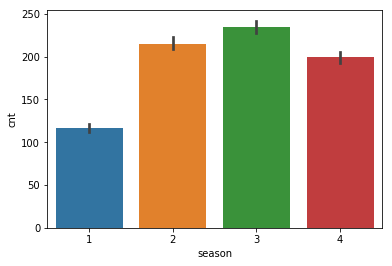

draw col: holiday


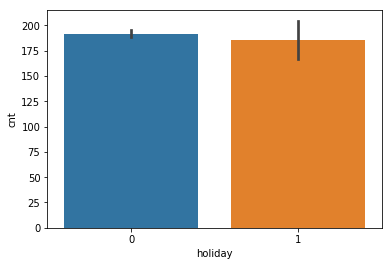

draw col: workingday


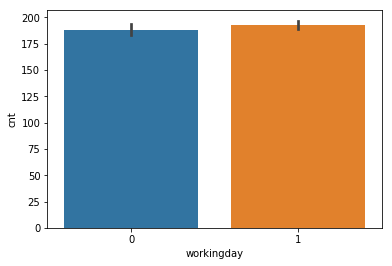

draw col: weather


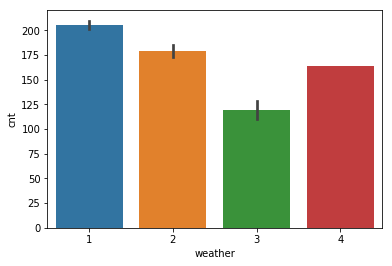

draw col: temp


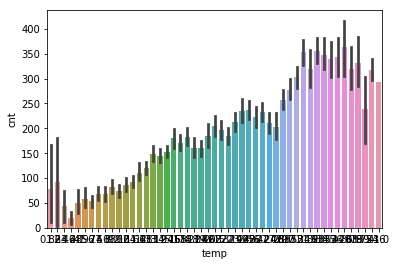

draw col: atemp


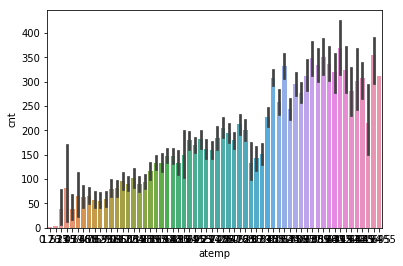

draw col: humidity


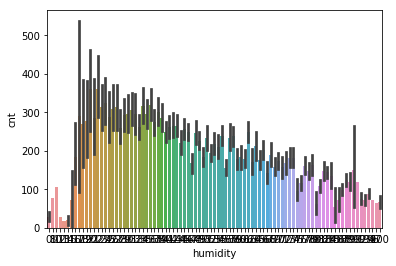

draw col: windspeed


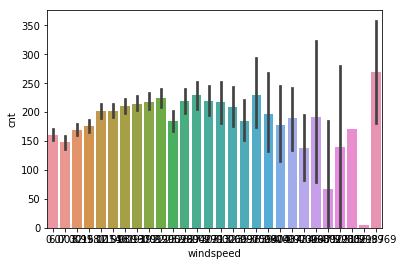

skip col : casual
draw col: registered


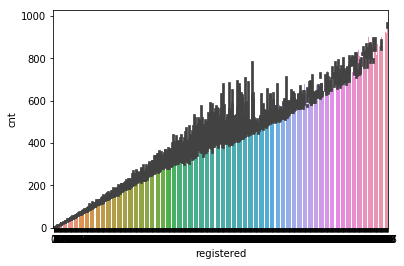

skip col : cnt


In [34]:
skip_col=["casual","registered","cnt","datetime"]
for col in train.columns:
    if col in skip_col:
        print("skip col :",col)
        continue
    print("draw col:",col)
    bar_plot(col,"cnt",train)

skip col : datetime
draw col: season


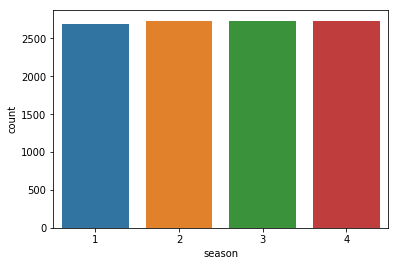

draw col: holiday


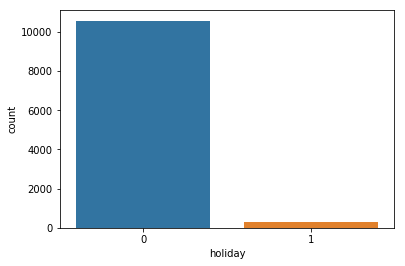

draw col: workingday


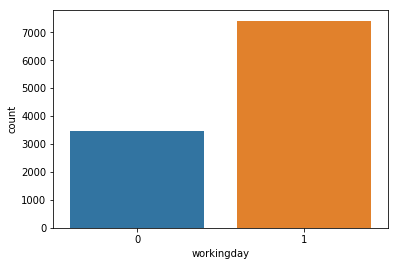

draw col: weather


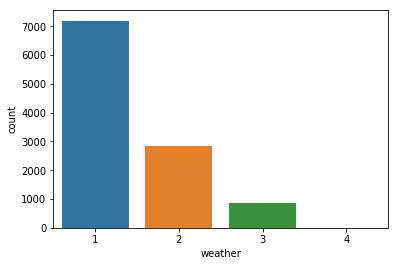

draw col: temp


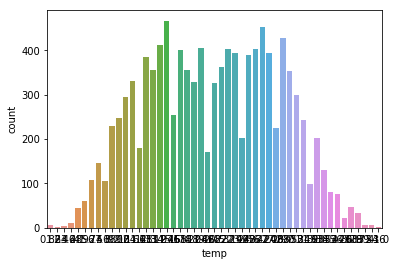

draw col: atemp


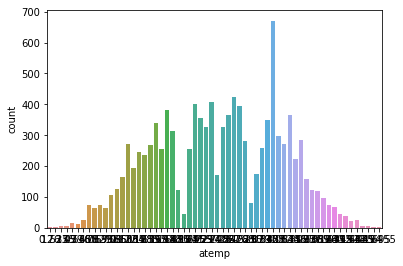

draw col: humidity


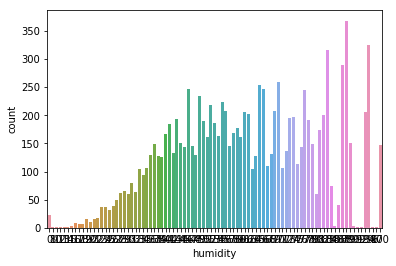

draw col: windspeed


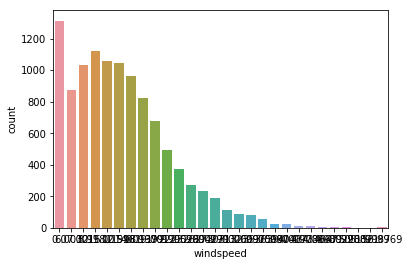

skip col : casual
skip col : registered
skip col : cnt


In [47]:
skip_col=["casual","registered","cnt","datetime"]
for col in train.columns:
    if col in skip_col:
        print("skip col :",col)
        continue
    print("draw col:",col)
    count_plot(train[col])

skip col : datetime
draw col: season


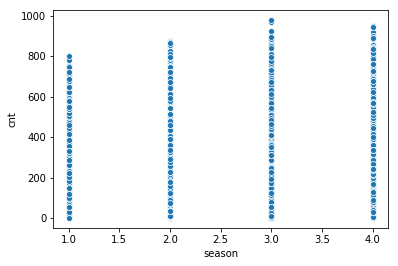

draw col: holiday


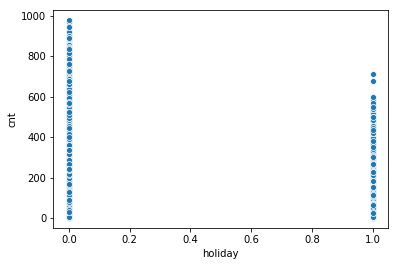

draw col: workingday


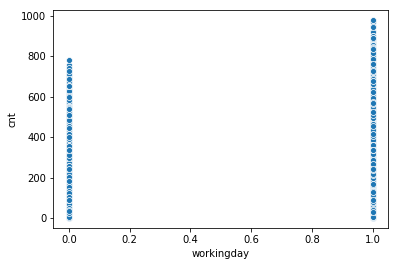

draw col: weather


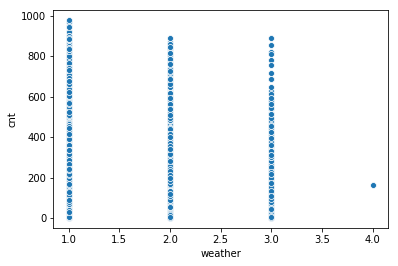

draw col: temp


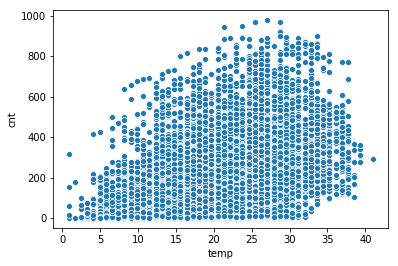

draw col: atemp


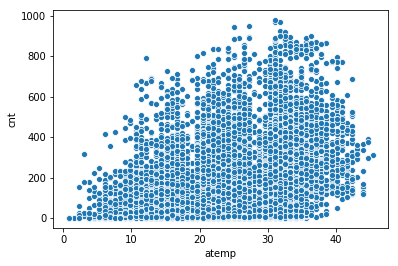

draw col: humidity


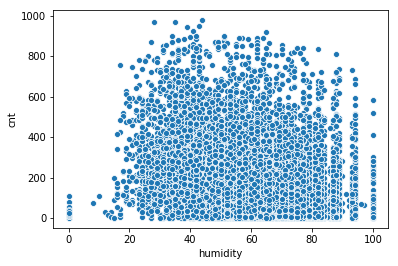

draw col: windspeed


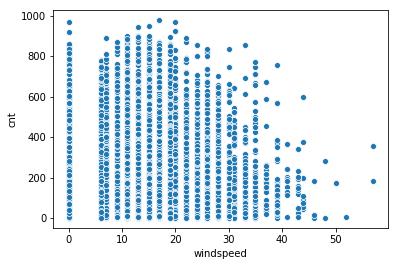

skip col : casual
skip col : registered
skip col : cnt


In [51]:
skip_col=["casual","registered","cnt","datetime"]
for col in train.columns:
    if col in skip_col:
        print("skip col :",col)
        continue
    print("draw col:",col)
    scatter_plot(train[col],train["cnt"])

In [96]:
all_data["is_test"]=all_data["cnt"].isnull()

In [97]:
all_data.is_test.value_counts()

False    10886
True      6493
Name: is_test, dtype: int64

In [98]:
train.shape,test.shape

((10886, 12), (6493, 12))

In [99]:
all_data["year"]=all_data["datetime"].dt.year
all_data["month"]=all_data["datetime"].dt.month
all_data["hour"]=all_data["datetime"].dt.hour


In [100]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 16 columns):
datetime      17379 non-null datetime64[ns]
season        17379 non-null int64
holiday       17379 non-null int64
workingday    17379 non-null int64
weather       17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
humidity      17379 non-null int64
windspeed     17379 non-null float64
casual        10886 non-null float64
registered    10886 non-null float64
cnt           10886 non-null float64
is_test       17379 non-null bool
year          17379 non-null int64
month         17379 non-null int64
hour          17379 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(6), int64(8)
memory usage: 2.1 MB


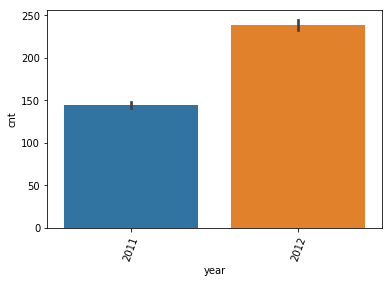

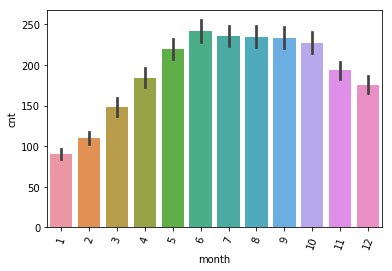

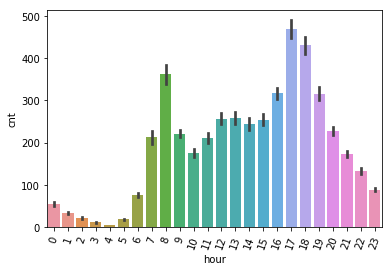

In [101]:
bar_col=["year","month","hour"]
for col in bar_col:
    bar_plot(col,"cnt",data=all_data.dropna())

In [102]:
all_data["year_month"]=all_data["year"].astype("str")+"_"+all_data["month"].astype("str")

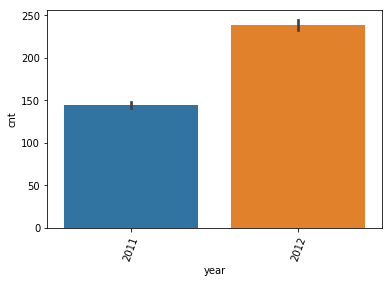

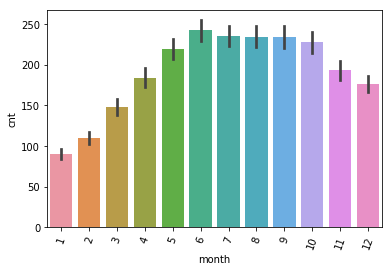

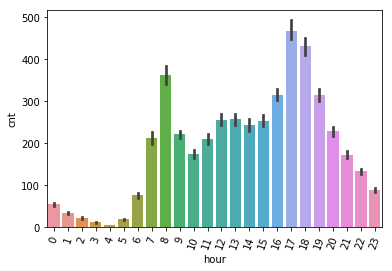

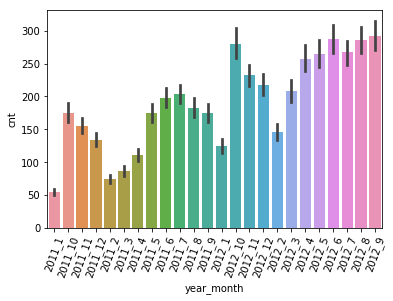

In [103]:
bar_col=["year","month","hour","year_month"]
for col in bar_col:
    bar_plot(col,"cnt",data=all_data.dropna())

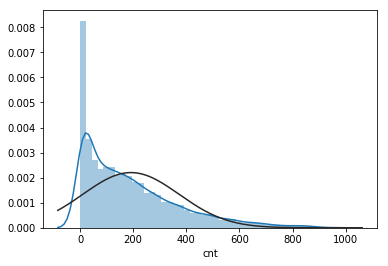

191.57413191254824 181.1361335742659


In [109]:
dist_plot(y_train)
mu,sigma=norm.fit(y_train)
print(mu,sigma)

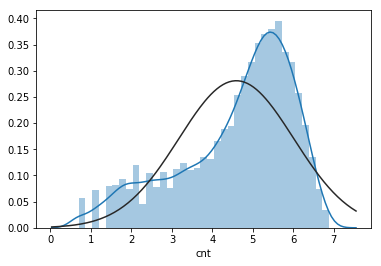

4.591363690454027 1.4193889866524083


In [110]:
y_train=np.log1p(y_train)
dist_plot(y_train)
mu,sigma=norm.fit(y_train)
print(mu,sigma)

In [112]:
all_data.drop(["casual","registered","cnt"],axis=1,inplace=True)
all_data.drop(["datetime","is_test"],axis=1,inplace=True)

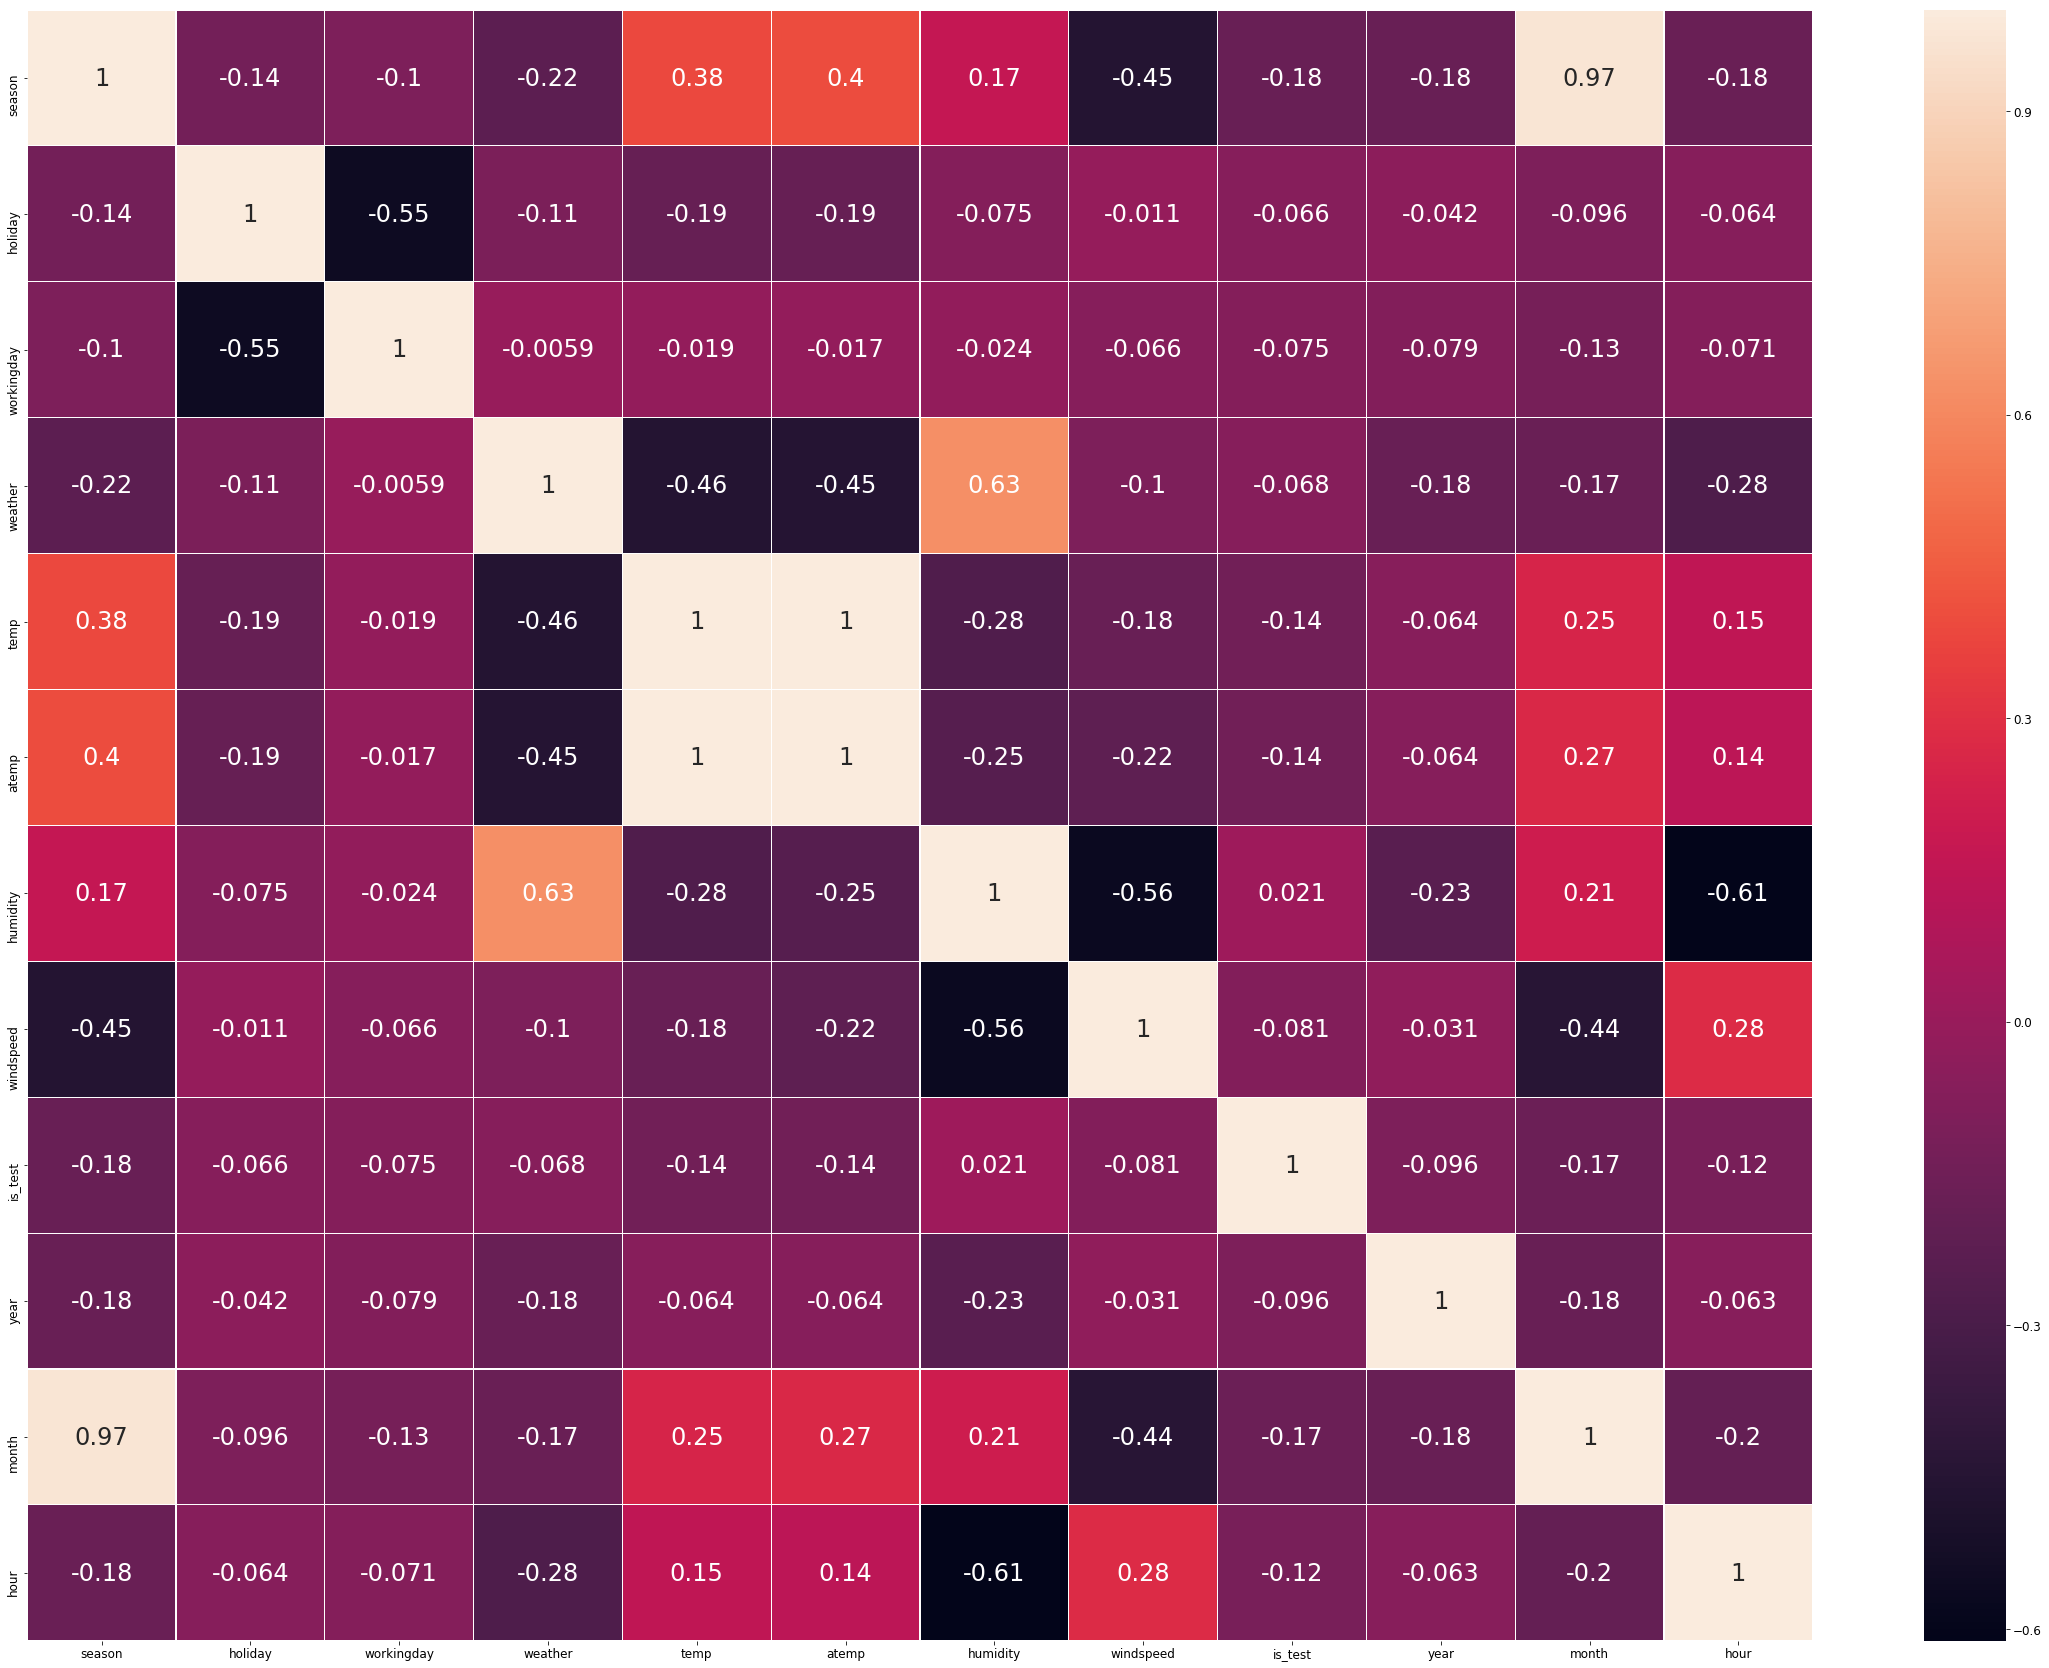

In [124]:
plt.rcParams.update({'font.size': 12})
corr=all_data.corr()
f,ax=plt.subplots(figsize=(40,30))
sns.heatmap(corr.astype(float).corr(),linewidths=0.1,annot=True,annot_kws={'size':24})

In [128]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 12 columns):
season        17379 non-null int64
holiday       17379 non-null int64
workingday    17379 non-null int64
weather       17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
humidity      17379 non-null int64
windspeed     17379 non-null float64
year          17379 non-null int64
month         17379 non-null int64
hour          17379 non-null int64
year_month    17379 non-null object
dtypes: float64(3), int64(8), object(1)
memory usage: 1.7+ MB


In [129]:
all_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.028770,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,2011.502561,6.537775,11.546752
std,1.106918,0.167165,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,0.500008,3.438776,6.914405
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,2011.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,2011.000000,4.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,2012.000000,7.000000,12.000000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,2012.000000,10.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,2012.000000,12.000000,23.000000


In [130]:
# columns=["season","holiday","workingday","weather","workingday","hour"]
# for col in columns:
#     all_data[col]=all_data[col].astype(str)

In [133]:
all_data.shape

(17379, 35)

In [132]:
all_data=pd.get_dummies(all_data)

In [143]:
train=all_data[:n_train]
test=all_data[n_train:]

## Model

In [134]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

c:\python\python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [148]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    print(kf)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [136]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))


In [137]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [138]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [139]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [140]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [141]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [144]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 1.0427 (0.0445)



In [145]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 1.0430 (0.0445)



In [146]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.9584 (0.0596)



In [147]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.4320 (0.1359)



In [149]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

5


c:\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
c:\python\python36\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Xgboost score: 0.4049 (0.1355)



In [150]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

5
LGBM score: 0.5253 (0.1131)



In [151]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [152]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

5
 Averaged base models score: 0.7831 (0.0410)



In [155]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [160]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

5
Stacking Averaged models score: 0.4263 (0.1417)


In [161]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [162]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.2621802275908099


In [164]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.4171128902345299


In [165]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.27310423952913404


In [168]:
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.45 +
               xgb_train_pred*0.45 + lgb_train_pred*0.1 ))

RMSLE score on train data:
0.27167964829729496


In [169]:
ensemble = stacked_pred*0.45 + xgb_pred*0.45 + lgb_pred*0.1

In [174]:
sub = pd.DataFrame()
sub['datetime'] = test.datetime
sub['count'] = ensemble

from datetime import datetime
now=datetime.now()
sub.to_csv("data/{0:02d}{1:02d}{2:02d}{3:02d}_ensemble_submission.csv".format(now.year,now.month,now.day,now.hour),index=False)

In [173]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null datetime64[ns]
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB
